<a href="https://colab.research.google.com/github/EverHernandez01/Senales_y-_Sistemas_2025_S2/blob/main/Tares1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

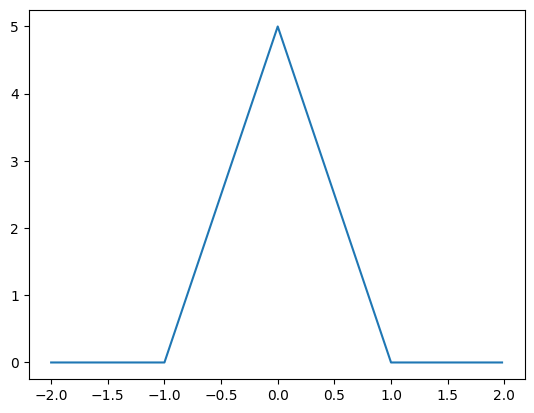

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact

T = 4 #Intervalo de la señal
B = 5 # Altura de la señal
d1 = 1 # d1<T/2
Fs = 200*1/T # periodo de muestreo
Ts = 1/Fs
t = np.arange(-T/2,T/2,Ts)
x = np.zeros(len(t))
x[(t>=-d1)&(t<0)] = (B/d1) * t[(t>=-d1)&(t<0)] + B
x[(t>=0)&(t<d1)] = -(B/d1) * t[(t>=0)&(t<d1)] + B
plt.plot(t,x)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


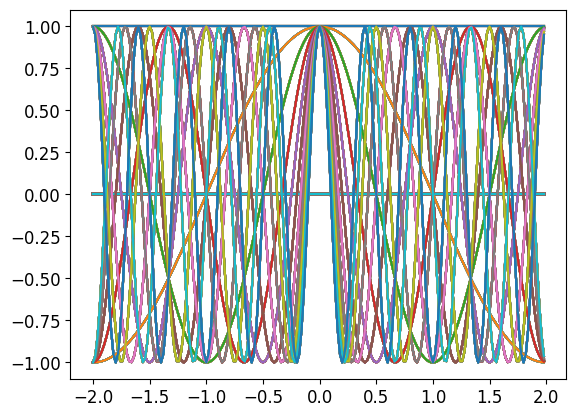

In [2]:
N = 10 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
Nm = len(t)
phin = np.zeros((Nm,2*N+1),dtype=np.complex128)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*t)#base de fourier en el intervalo de interés
    plt.plot(t,phin)

In [3]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex128)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = (B/(wo*d1*np.pi*nv**2))*(1-np.cos(nv*wo*d1))
Cn[N] = (B *d1) / T # se modifico

/tmp/ipython-input-3300023789.py:4: RuntimeWarning: divide by zero encountered in divide
  Cn = (B/(wo*d1*np.pi*nv**2))*(1-np.cos(nv*wo*d1))
/tmp/ipython-input-3300023789.py:4: RuntimeWarning: invalid value encountered in multiply
  Cn = (B/(wo*d1*np.pi*nv**2))*(1-np.cos(nv*wo*d1))


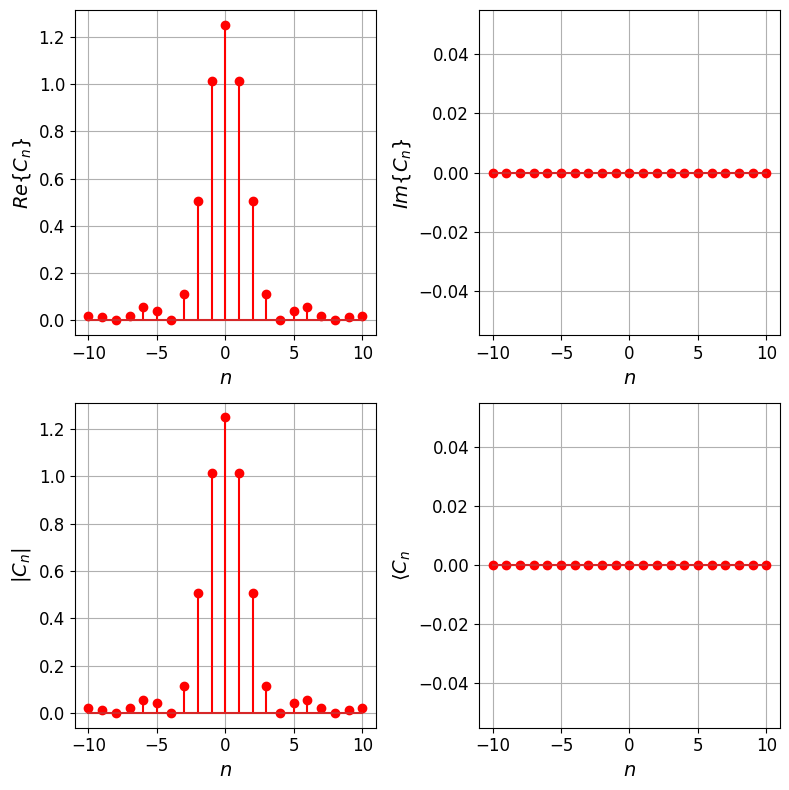

In [4]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

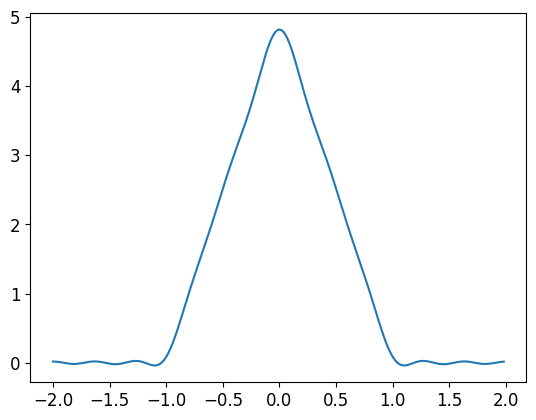

In [5]:
xe = phin.dot(Cn) # dot calcula el producto entre vectores
plt.plot(t,xe)
plt.show()

In [6]:
#T A R E A

Px = (2 * B**2 * d1) / (3 * T)  # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N - Na, N + Na + 1)
    P_aprox = np.sum(np.abs(Cn[ind])**2)
    er = 1 - P_aprox / Px
    #señal reconstruida
    xe = phin[:, ind].dot(Cn[ind])
    plt.plot(t, np.real(xe), color='b', label=rf'$\hat{{x}}(t)$ (reconstruida)')
    plt.plot(t, x, color='r', label='$x(t)$ (Original)')
    title_str = rf'$N_a = {Na}$ armónicos --> $E_r = {100*er:.2f}\%$'
    plt.title(title_str, fontsize=14)

    plt.xlabel('t [s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest, Na=(0, N, 1))

interactive(children=(IntSlider(value=1, description='Na', max=10), Output()), _dom_classes=('widget-interact'…

<function __main__.pltest(Na=1)>